# Data Fundamentals (H)
John H. Williamson -- Session 2018/2019

----
<font color="red"> Read the submission instructions at the bottom of this notebook **carefully** before submitting </font> 

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

Note that marks shown when tests pass are **provisional** and could change after grading.

In [1]:
NAME = "Stuart Reilly" ## fill these in 
STUDENT_ID = "2258082"  ## e.g. 2222222

---

## Lab 3: Assessed
# Scientific visualisation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

I recommend reading the lecture notes supplement *"Criticising Visualisations"* on Moodle as a quick reference summary. 

**This exercise is assessed**. Make sure you upload your solution by the deadline. See the notes at the bottom of this notebook for submission guidance.  This exercise is manually graded. Marks are out of 60. Each cell shows the marks available at the top (e.g. `## 5 marks`). `summarise_marks()` will not do anything in this lab, as there is no automarking.

### References
If you are stuck, the following resources are very helpful:

* [Introduction to Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Matplotlib command summary](https://matplotlib.org/api/pyplot_summary.html)




In [28]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy

# make the plots look good inline
%matplotlib notebook
# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
print("Everything imported OK")


Everything imported OK


## Purpose of this lab
This lab should help you:
* understand how to use Matplotlib for basic plotting tasks
* create simple, clean and correct 2D plots of two variables 
* create plots with multiple conditions
* plot basic statistics of datasets, representing uncertainty appropriately
* explicitly criticise existing visualisations and  suggest and implement concrete suggestions to improve them


# matplotlib Tutorial
We'll go through the first example from the lecture notes. You'll need to apply these ideas yourself later, so make sure you understand what happens here. This part of the lab is for information, and is not part of the assessment.

**Follow this tutorial carefully before attempting the lab exercise below**

In this example, the plotting commands are split up among notebook cells so that each step can be explained. In your code, just have all of the commands in one cell, to avoid having to scroll up and down as you make changes.

## Some data
This data is synthetic. It's a simple trigonometric function; the details don't particularly matter.

In [29]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

## generate an x value to be transformed
x = np.linspace(-3*np.pi, 3 * np.pi, 500)

## Figures
To begin any plotting we must create a **figure**, which is a "blank canvas" onto which we can add visualisations. **Important: the visualisation will always appear in the output of whichever cell has the `plt.figure()` call.** As a consequence, all of the commands below will affect in the output of the cell below.

When you go through the various steps below, scroll back up to this cell to see their effect. Note that usually all plotting commands go in *one* cell, so we don't end up scrolling about.

<IPython.core.display.Javascript object>


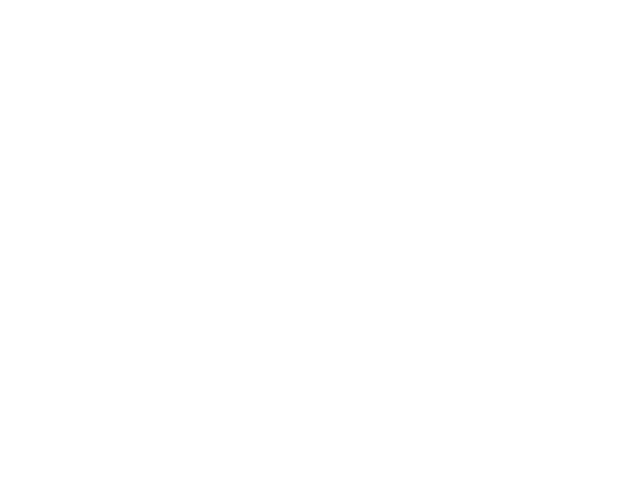

In [30]:
fig = plt.figure()  # create a new figure. It will be blank.

## If you want a different size of figure, you can use:
# fig = plt.figure(figsize=(3,3)) # quite small
# the default size set here is good for this exercise

## Axes
To draw anything, we must define **axes**. Each axes is a facet of a plot. It has a coordinate system which can be used to draw data. 

The call to create a new axis is formatted `fig.add_subplot(rows, columns, index)` which will create a subplot in a matrix of axes indexed by the index. The index increases column-wise, then row-wise, and starts from *1* (not 0!)

For example, we could create a 3x2 array of plots, and select the middle-left plot
using `plt.add_subplot(3, 2, 3)`

        --------
       | 1 | 2 |
       | 3 | 4 |
       | 5 | 6 |
       ---------

Most of the time, though, we just want one axes that fills the figure and `fig.add_subplot(1,1,1)` does that. The object it returns is what we use for all subsequent plotting.

In [31]:
ax = fig.add_subplot(1, 1, 1)  
# create a new subplot, returning a set of axes
# look above ^ ^ at the figure. You should see the axes appear


We make a line plot of `x` against `f(x, k)` for a few fixed values of `k`.
Each subsequent plot will be a new color, and all of the plots will be overlaid on the axes

`ax.plot(x,y)` is the basic line plotting command. It is called on an axes object.

Note that the `label=` gives a label that the `legend` command will use to label the graph afterwards. Always label plots if you want readers to be able to distinguish them.

In [32]:
ax.cla()  # cla means to CLear Axes. 
# it does nothing the first time we run it, but it will clear the plot and redraw if
# you run this cell multiple times. Try commenting it out and running this cell twice!


ax.plot(x, pulse(x,1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# you can adjust the styling of the plot manually: 
#   here the color is black ("k") 
#   and the linestyle is dotted (":")
ax.plot(x, pulse(x, 500), label='k=500', color='k', linestyle=':')

## note that there are several built-in colors called
# C0, C1, C2, C3, C4, C5, and C6
# they will generally look good
# try changing the 'k' above to 'C6'

**Look above to see the result**. Notice the different colouring. Repeated plots on one axis create new **layers** in the visualisation.

Now we can add **labels** to the plot. There should always be a label for the x-axis, y-axis and a title for the axes. We should also have a **legend** if multiple layers are used. `ax.legend()` will draw one. It can be configured in many ways, but the defaults are fine here.

In [33]:
# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")        # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls, like ax.plot(x,y, label="xy")
ax.legend()

By default, the scaling of the axis will be adjusted to fit the data. This isn't always a good idea, so you can adjust it manually. The axis limits are set by `ax.set_xlim(min,max)` and `ax.set_ylim(min,max)` and these adjust the scaling of the axes. This configures the **coords** used to draw data.

You can try changing these to see different parts of the curve.

**Note that you don't need to call the plot commands again when you update the axis limits.**

In [34]:
## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

(-0.25, 1.2)

### Tweaking
We can tweak the plot in many ways. Try some of the below.

In [35]:
# grid 
ax.grid(True) # or False to turn it off

In [36]:
# frame
ax.set_frame_on(False) # or True to turn it back on

In [37]:
ax.set_xticks([-10, -5, 0, 5, 10]) # Tick positions on the x axis
ax.set_yticks([0,0.5,1.0]) # and on the y-axis

In [38]:
# this is a fancier tick adjustment
# Tick positions on the x axis
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]) 

# we can relabel the ticks using the same order. 
# LaTeX formulae work if inside $ symbols
ax.set_xticklabels(["$-2\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"])

[Text(-10, 0, '$-2\\pi$'),
 Text(-5, 0, '$-\\pi$'),
 Text(0, 0, '0'),
 Text(5, 0, '$\\pi$'),
 Text(10, 0, '$2\\pi$')]

The standard colours in matplotlib are shown below (you can also specify custom colours)

<IPython.core.display.Javascript object>


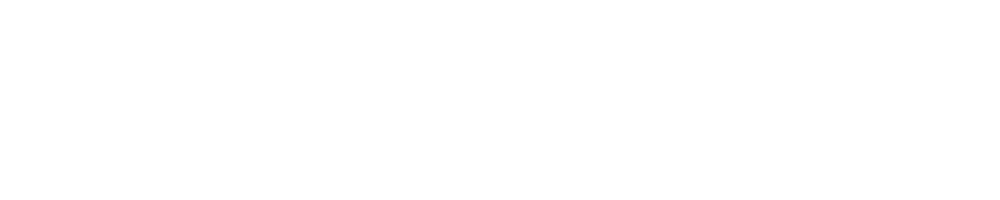

(-0.75, 15.75, 0.0, 1.0)

In [39]:
## Standard colours
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
fig.set_facecolor("#f0f0f0")  # can always use Hex colors, or floating point arrays
for i,col in enumerate(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", 
                        "r", "g", "b", "c", "m", "y", "k", "w"]):
    
    # plot, and add some simple text
    ax.plot(i, 0.5, c=col, marker='s', markersize=20)
    # alpha sets opacity of rendering
    ax.text(i, 0.5+0.15, col, ha='center', color=col, alpha=0.5)
    
ax.set_ylim(0,1) # set axis limits    
ax.axis("off") # remove axis; there are no units to show
 
    

---------

# 1. Simple plots [30 minutes]

For these exercises, you need to plot graphs showing the data which is provided to you. To get full credit you must:
    
* choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice.
* plot the data correctly
* make sure all the details are sensible (axes, labelling, etc.)
* **write a short caption for the data in the cell provided.**

You will get the name of the file with the data, along with a comment that explains the format of the data. You can use `np.loadtxt()` to load the datasets.

You will have to look at the lecture notes and/or the documentation to complete this exercise.


A)
* Data file: `data/cherry_trees.txt`
* Description: Height and volume of black cherry trees  measured in an orchard.
* Columns:
  
       Height (ft)  Volume (ft^3)

Note: plot your graph in **metric units**. 1 ft = 0.3048m
       
    

<IPython.core.display.Javascript object>


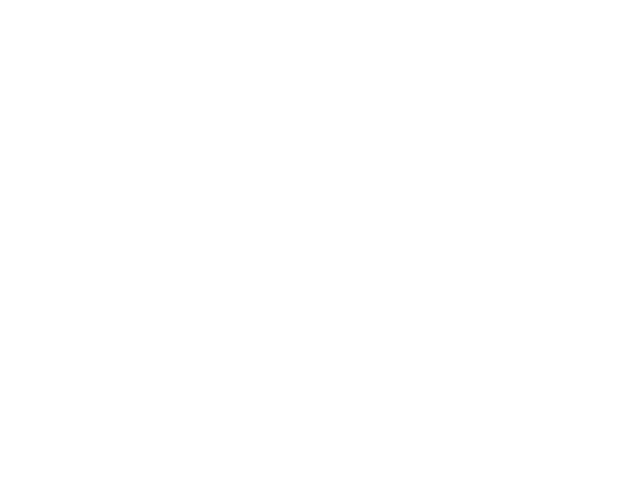

In [40]:
## 4 marks
# YOUR CODE HERE
from matplotlib.image import imread
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

img = imread("https://www.emoji.co.uk/files/apple-emojis/animals-nature-ios/285-deciduous-tree.png")

data = np.loadtxt("data/cherry_trees.txt")
figure = plt.figure()
axes = figure.add_subplot(1,1,1)

split = np.hsplit(data, 2)
split[0] *= 0.3048
split[1] *= (0.3048 ** 3)
axes.cla()
axes.scatter(split[0], split[1])
axes.set_xlabel("Height (m)")
axes.set_ylabel("Volume (m^3)")
axes.set_title("Volume of black cherry trees based on their height")

imscatter(split[0], split[1], img, zoom=0.05, ax=axes) # Remove this line to not use trees as markers

### Caption [1 mark]
A graph to show the relationship between the height and volume of black cherry trees.

B)
* Data file: `data/air_passengers.txt`
* Description: The number of international air passengers, each month, 1949 to 1960.
* Columns:

      year   passenger_count


<IPython.core.display.Javascript object>


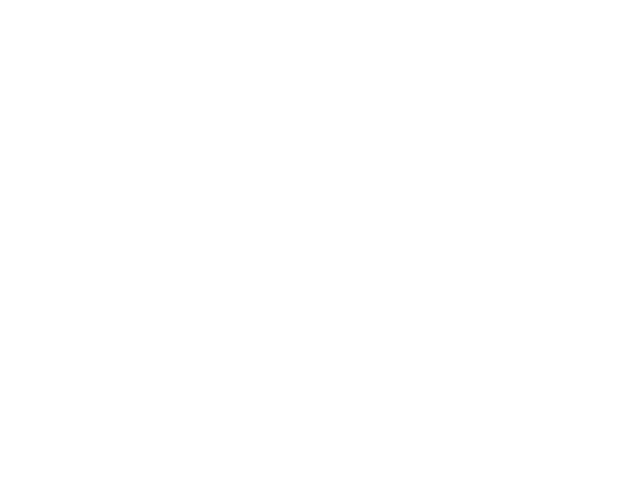

Text(0.5, 1.0, 'Number of International Passengers Between 1949 and 1960')

In [15]:
## 4 marks
# YOUR CODE HERE
data = np.loadtxt("data/air_passengers.txt")
figure = plt.figure()
axes = figure.add_subplot(1,1,1)
axes.cla()

data = data[data[:,0] > 1949]
data = data[data[:,0] < 1960]
split = np.hsplit(data, 2)

axes.plot(split[0], split[1])
axes.set_xlabel("Year")
axes.set_ylabel("No of International Passengers")
axes.set_title("Number of International Passengers Between 1949 and 1960")

### Caption [1 mark]
A graph to show how the number of international passengers varied between 1949 and 1960.

C) 
* Data file: `data/rivers.txt`
* Description: Length of major rivers in the United States (miles)
* Columns:
   
       river_length



<IPython.core.display.Javascript object>


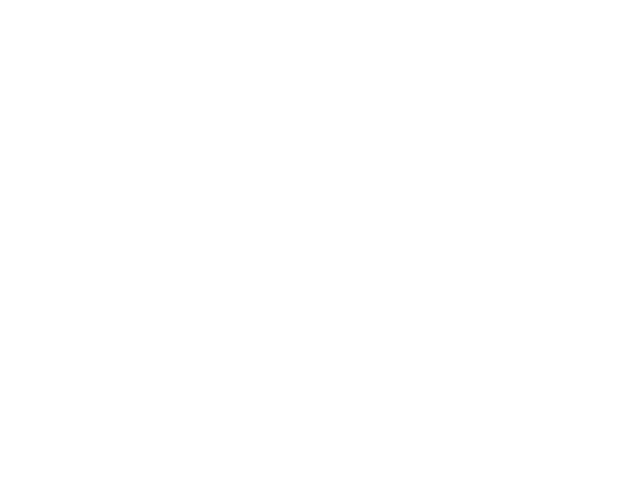

In [41]:
## 6 marks
# YOUR CODE HERE
data = np.loadtxt("data/rivers.txt")
figure = plt.figure()
axes = figure.add_subplot(1,1,1)
axes.cla()

axes.hist(data, bins=200)
axes.set_xlabel("Length of River (miles)")
axes.set_ylabel("Number")
axes.set_title("Lengths of Major Rivers in the USA")
print()

### Caption [1 mark]
A graph to show the lengths of major rivers in the USA.

# 2. Layered and faceted plots [45 minutes]

A **layered** plot has more than one set of geoms overlaid on the same coordinate system. A **faceted** plot uses multiple coordinate systems to show different views of the data.

For the dataset, appropriately use layering, faceting and reduction operations to show the dataset. 


<img src="imgs/chocolate.jpg"> <br><br>*[[Image](https://flickr.com/photos/myhsu/3146912657 "Black As Chocolate") by [myhsu](https://flickr.com/people/myhsu) shared [CC BY-ND](https://creativecommons.org/licenses/by-nd/2.0/)]*

A)
* Data file `data/cake.txt`
* Description: 
>Data on the breakage angle of chocolate cakes made with three different
recipes and baked at six different temperatures. The angle of breakage is affected by the recipe and temperature. The experiment was repeated 15 times (replicates).

* Columns:

        replicate(1-15)    recipe(0-2)    temp(deg F)    angle(deg)

Use this model:
* Facet `recipes`
* Layer `replicates`

* Colour each replicate identically, and use lowered opacity.

* As well as the layered replicates, clearly show the mean and standard deviation of the breakage angle in each facet as a line geom and a ribbon geom.

* Convert Fahrenheit to Celsius before plotting. 

* `plt.tight_layout()` will fix layout of facets. Set a super-title across all facets using `fig.suptitle()`. 

* You will need one or more `for` loops (probably) to solve this problem.
* Use Boolean arrays to perform `group by` like operations.



<IPython.core.display.Javascript object>


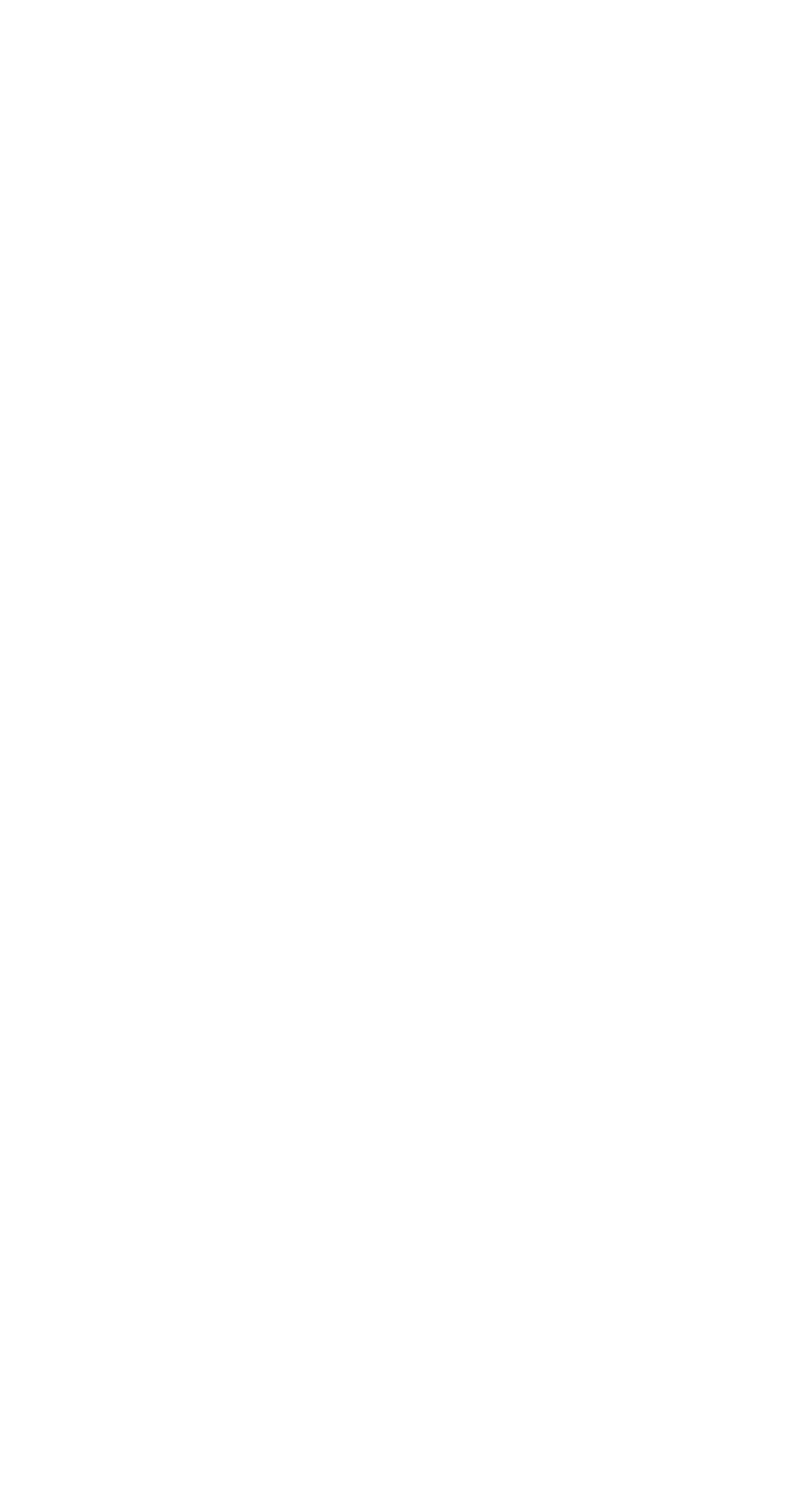

In [42]:
# 10 marks
import numpy_indexed as npi # Used to provide vectorised group_by

def celsius(f):
    return 100.0 * ((f - 32) / (212-32))

# YOUR CODE HERE
#
figure, axes = plt.subplots(3,1, figsize=(8,15), constrained_layout=True)
axes = axes.flatten();
data = np.loadtxt("data/cake.txt")
data[:, 2] = celsius(data[:, 2])
figure.suptitle("Relationships between the temperature a cake is cooked at\nand its breakage angle, depending on its recipe\n")

for i in range(0, len(axes)):
    recipe_data = data[data[:, 1] == i]
    axis = axes[i]
    mean = npi.group_by(recipe_data[:, 2]).mean(recipe_data)[1][:, 3]
    std = npi.group_by(recipe_data[:, 2]).std(recipe_data)[1][:, 3]
    x_vals = np.unique(recipe_data[:,2])
    
    axis.scatter(recipe_data[:,2], recipe_data[:, 3], alpha=0.5)
    axis.plot(x_vals, mean)
    axis.fill_between(x_vals, mean-std, mean+std, alpha=0.3)
    
    axis.set_title("Recipe " + str(i))
    axis.set_ylabel("Angle (°)")
    axis.set_xlabel("Temperature (°C)")
    

### Caption
A figure to show how the the recipe to used to bake a cake and the tempature at which it is baked, impacts the angle of breakage of the cake.

# 3. Some uncertainty [30 minutes]

You are provided with data on the effect of five insecticide sprays on populations of pest insects. Compare and contrast these sprays, **appropriately representing uncertainty**.


* Data file: `data/insects.txt`
* Description: The counts of insects on each leaf of a plant in agricultural experimental units treated with
different insecticides.
* Columns:

            insect_count spray_id (0-5)


* Plot the data, on three separate figures, using:
    * A simple bar chart of the mean insect counts (grouped by spray).
    * A barchart showing the mean counts (grouped), and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the [`plt.bar` documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)). The standard deviation of an array can be computed by `np.std(x, axis)`, just like `np.mean()`.
    * A Box plot of the insect counts.

* Mark the ticks on the x axis using the names of the sprays.

        0 = Insecticator
        1 = Placebo
        2 = BuzzNoMore
        3 = Aprotex
        4 = DieOff

* For this section, you don't need to write the caption. Assume the caption is:

> Effectiveness of insecticides in a farm environment. Five different aerosol insecticides were tested.



In [43]:
# 4 marks
# load and group the data
# YOUR CODE HERE
data = np.loadtxt("data/insects.txt")
grouped = npi.group_by(data[:, 1])
x_vals = np.unique(data[:,1])
insecticides = ["", "Insecticator", "Placebo", "BuzzNoMore", "Aprotex", "DieOff"]

<IPython.core.display.Javascript object>


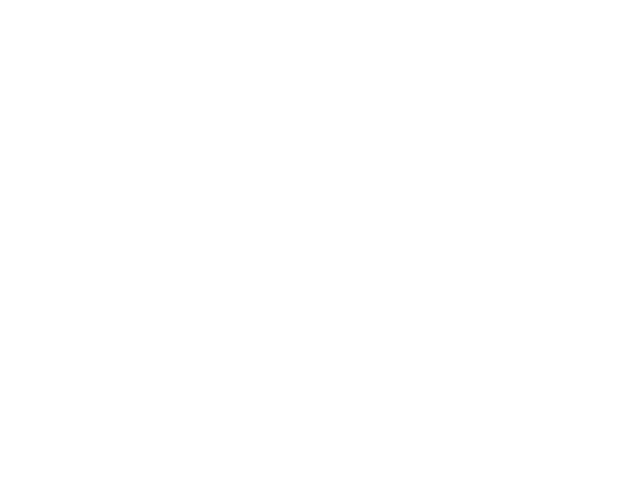

Text(0.5, 0, 'Insectiside')

In [44]:
# 2 marks
# plot the means
# YOUR CODE HERE
mean_figure = plt.figure()
mean = grouped.mean(data)[1][:,0]
mean_axis = mean_figure.add_subplot(1,1,1)
mean_axis.cla()
mean_axis.set_xticklabels(insecticides)
mean_axis.bar(x_vals, mean)
mean_axis.set_title("Mean insect death count of each insectiside")
mean_axis.set_ylabel("Count")
mean_axis.set_xlabel("Insectiside")

<IPython.core.display.Javascript object>


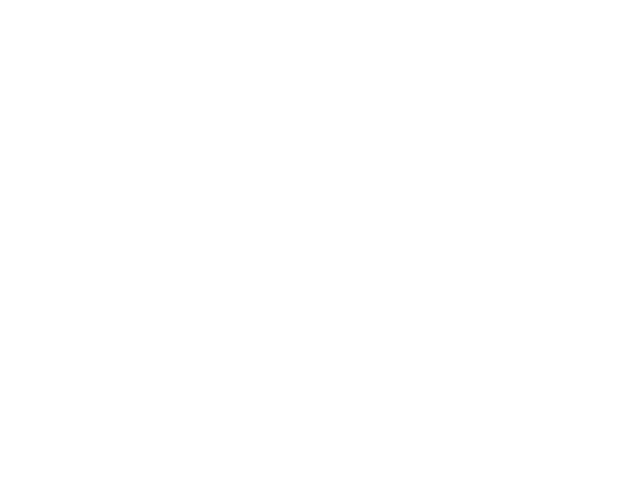

In [20]:
# 2 marks
# plot the means with std. devs.
# YOUR CODE HERE
std_figure = plt.figure()
std = grouped.std(data)[1][:,0]
std_axis = std_figure.add_subplot(1,1,1)
std_axis.cla()
std_axis.set_xticklabels(insecticides)
std_axis.set_title("Mean insect death count of each insectiside")
std_axis.set_ylabel("Count")
std_axis.set_xlabel("Insectiside")
#Axis.bar returns BarContainer, which has errorbar if given, errorbar has lines, where [1] is the tuple of the caps
std_errbar = std_axis.bar(x_vals, mean, yerr=std/2, error_kw={"capsize":5}).errorbar.lines[1][0]
std_figure.legend((std_errbar,), ('Standard Deviation',))

<IPython.core.display.Javascript object>


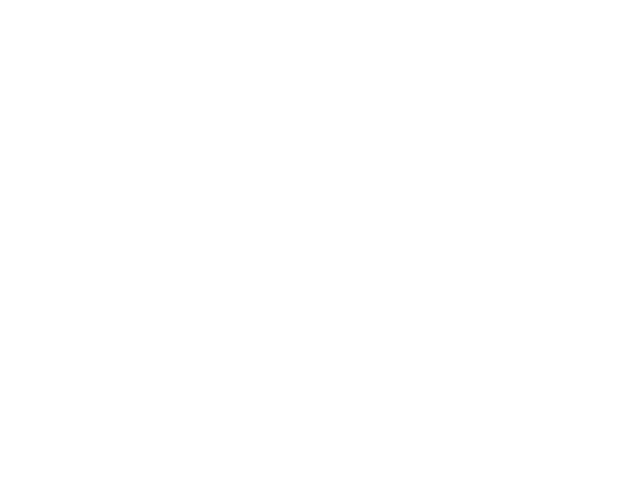

Text(0.5, 0, 'Insectiside')

In [45]:
# 2 marks
# a Box plot
# YOUR CODE HERE
box_figure = plt.figure()
box_axis = box_figure.add_subplot(1,1,1)
box_axis.boxplot(np.delete(grouped.split(data), 1, 2).reshape(5, -1).T)
box_axis.set_xticklabels(insecticides[1:])
box_axis.set_title("Insect death count of each insectiside")
box_axis.set_ylabel("Count")
box_axis.set_xlabel("Insectiside")

# 4. Constructively criticising visualisations [1.25 hour]
Write a short criticism of the plot below each one. Your criticism should reflect upon the scientific and aesthetic quality of the plots. You are provided with the code which generates the plots. **Copy the cell** that generates the plot and improve the flaws you found.

You criticism should be *a few bullet points* and not more. Note that you can format a bulleted list by using an asterisk at the start of a line:


    * this
    * will
    * be 
    * bulleted
    
when you edit the criticism cell.


## A: Earthquakes in California

* Dataset: Acceleration measurements at seismic stations placed around California, measuring the peak acceleration experienced during earthquakes, along with the distance of the station to the hypocenter of that earthquake.
* File: `data/cali_earthquakes.txt`
* Columns

       earthquake_id magnitude(Richter) station_id distance_to_hypocenter(km) acceleration(g) 

* Caption:

>    This plot shows the variation in acceleration at seismic monitoring stations as a function of distance to hypocentre of earthquakes in California. More distant stations measure smaller signals with some variation according to the strength of the originating earthquake.
    


<IPython.core.display.Javascript object>


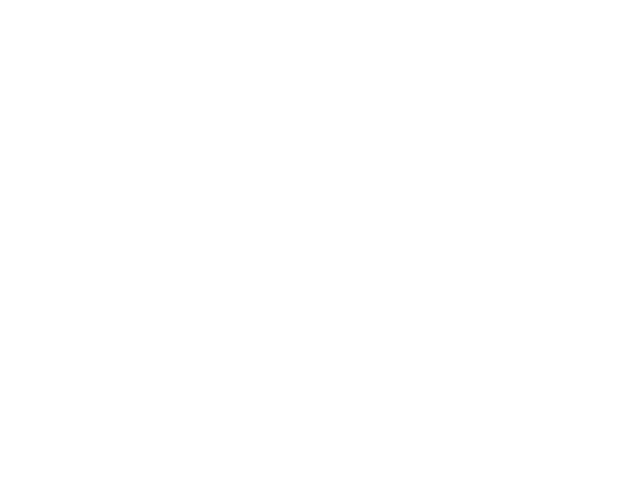

In [46]:
earthquakes = np.loadtxt("data/cali_earthquakes.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# name columns
earthquake, mag, station, distance, accel = [0,1,2,3,4]
plt.scatter(earthquakes[:,mag], earthquakes[:, accel], c=earthquakes[:, distance], cmap='Pastel2', s=300)


### Criticism [6 marks]
* No label for the axes
* No title
* The markers a too large and are completly opaque
* No legend to give meaning to the colouring
* Colouring is not monotomic
* Distance to the hypocentre should be the x axis, and magitude should be the colour

<IPython.core.display.Javascript object>


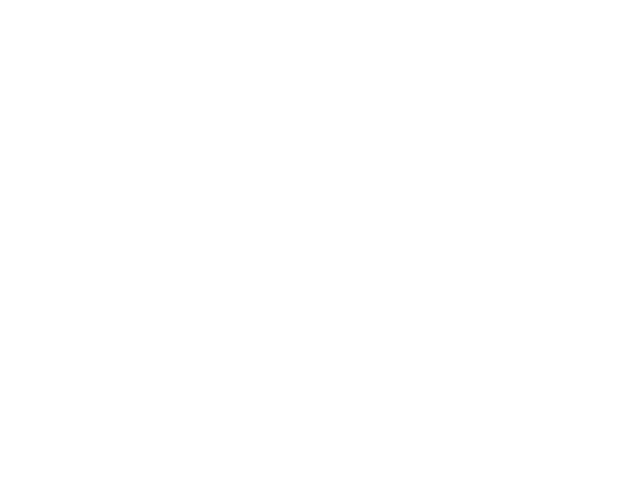

Text(0, 0.5, 'Acceleration (g)')

In [61]:
# 5 marks
# YOUR CODE HERE
plt.tight_layout()
earthquakes = np.loadtxt("data/cali_earthquakes.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# name columns
earthquake, mag, station, distance, accel = [0,1,2,3,4]
fig.colorbar(plt.scatter(earthquakes[:,distance], earthquakes[:, accel], c=earthquakes[:, mag], cmap='magma', s=100, alpha=0.6)).set_label("Magnitude (Richter)")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Acceleration (g)")
ax.set_title("")

## B: Reaction times and sleep

* Dataset: The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject.

* File `data/sleep_study.txt`
* Columns

         reaction time (ms)    sleep_deprivation (days)  subject_id (id)

* Caption:
> This plot shows how visual reaction time varies as subjects are deprived of sleep. Up to 10 days of sleep deprivation were tested.
    


<IPython.core.display.Javascript object>


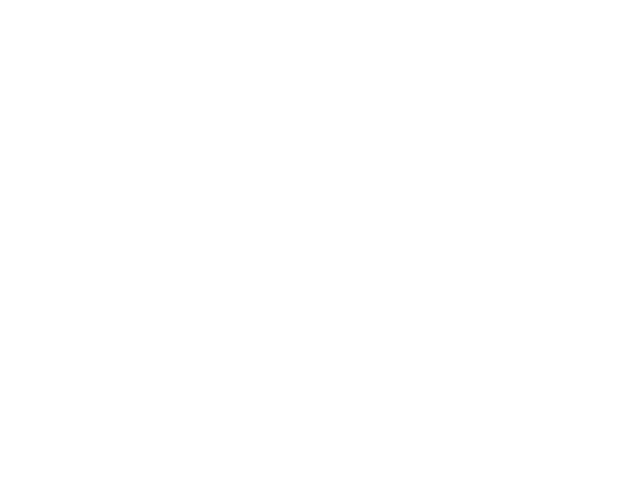

Text(0.5, 0, 'Reaction time')

In [62]:
sleep_study = np.loadtxt("data/sleep_study.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
reaction, sleep, subject = 0,1,2

# group each day
grouped =np.array([sleep_study[sleep_study[:,sleep]==i] for i in range(10)])
# take mean for each day and plot it
mean_reactions = np.mean(grouped, axis=1)[:,0] 
ax.plot(mean_reactions, np.arange(10))

# adjust axes
ax.set_xlim(0,1000)
ax.set_ylim(-2, 15)

ax.set_ylabel("Sleep deprivation")
ax.set_xlabel("Reaction time")

## Criticism [6 marks]
YOUR ANSWER HERE

In [25]:
# 6 marks
# YOUR CODE HERE

-----

# Submission instructions

### Checking your work
## Mark summary
You should check the marks you've got before submitting. To do this, 
* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and matriculation number at the top.
* SAVE THE NOTEBOOK, 
* Go to `Cell/Restart and Run All` in the menu.
* Check the output of the cell here.

Note that this is an estimated mark, and if you don't do the above procedure *carefully* you may get nonsense estimates.


In [26]:
summarise_marks()

NameError: name 'summarise_marks' is not defined

### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `week_<xxx>.ipynb`.


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Any form of plagiarism will be subject to the Plagiarism Policy. The penalties are severe.